<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           font-size:15px;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
<h3 style="font-size: 20px; color: #5eaaa8">Introduction</h3>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">
As mentioned in the problem, we had to create a survey form to collect necessary information like age, gender, state, city and product categories he or she likes. The dataset should contain at least 200 responses.<br><br>I have fulfilled all the prerequisites and have submitted the dataset along with this Jupyter Notebook.<br><br>
The next step was to use this information and perform Data Preprocessing, Eploratory Data Analytics and creating Machine Learning/ Deep learning to create a model.
So, I have divided this Jupyter Notebook in three main sections.<br><br></p>
   <ol>
   <li>Data Prepocessing </li>
   <li>EDA & Seaborn</li>
   <li>Model Creation</li>
       </ol>
</div>

<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           font-size:15px;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
<h3 style="font-size: 20px; color: #5eaaa8">1. Data Preprocessing</h3>
    <p style="font-family: 'Poppins', sans-serif; font-size: 16px;">
Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format. 
        </p>
</div>

In [6]:
#import all the liabraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# seting darkgrid style in seaborn style
sns.set_style('darkgrid')

In [7]:
#importing the dataset
dataFrame = pd.read_csv('Product Survey.csv')
dataFrame.head(3)

,Timestamp,What is your age? (example: 18),What is your gender?,Which state do you belong?,Your city is classified under which tier? To check it please open : https://neostencil.com/list-of-tier-1-and-tier-2-cities-in-india . If you can't find it here then mark tier 3.,What kind of products/services do you like most?,Which category of electronics products do you love most?,Which category of fashion products do you love most?,Which kind of paid subscriptions do you like the most?,Which category of books do you like the most?,Which category of fiction books do you like the most?,Which category of non-fiction books do you like the most?
0,7/25/2021 12:37:26,18,Male,Haryana,Tier 3,Fashion,Mobile Phones and accessories,Footwears,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Science Fiction,NaN
1,7/25/2021 12:46:45,18,Female,Delhi,Tier 1,Books,"Laptop, Desktop and Tablets",Clothing,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Suspense and thriller,NaN
2,7/25/2021 12:48:32,20,Male,Delhi,Tier 1,Fashion,Mobile Phones and accessories,Footwears,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Suspense and thriller,NaN


In [ ]:
#Segmenting the important features
dataFrame = dataFrame.iloc[:,1:12]
dataFrame.head()

,What is your age? (example: 18),What is your gender?,Which state do you belong?,Your city is classified under which tier? To check it please open : https://neostencil.com/list-of-tier-1-and-tier-2-cities-in-india . If you can't find it here then mark tier 3.,What kind of products/services do you like most?,Which category of electronics products do you love most?,Which category of fashion products do you love most?,Which kind of paid subscriptions do you like the most?,Which category of books do you like the most?,Which category of fiction books do you like the most?,Which category of non-fiction books do you like the most?
0,18,Male,Haryana,Tier 3,Fashion,Mobile Phones and accessories,Footwears,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Science Fiction,NaN
1,18,Female,Delhi,Tier 1,Books,"Laptop, Desktop and Tablets",Clothing,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Suspense and thriller,NaN
2,20,Male,Delhi,Tier 1,Fashion,Mobile Phones and accessories,Footwears,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Suspense and thriller,NaN
3,19,Female,Haryana,Tier 3,Fashion,"Earphone, Headphone or Speakers",Footwears,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Suspense and thriller,NaN
4,18,Female,Uttar Pradesh,Tier 1,Fashion,Mobile Phones and accessories,Jewellery,"E-commerce Platforms (Eg : Flipkart Plus, Amaz...",Non-Fiction,NaN,Autobiography & Biography


In [ ]:
#Changing the columns names
new_columns = ['Age','Gender','State','Tier','Favourite Category','Electronics','Fashion','Subscription','Books Category','Fiction','Non-Fiction']
dataFrame.columns = new_columns
dataFrame.head(3)

,Age,Gender,State,Tier,Favourite Category,Electronics,Fashion,Subscription,Books Category,Fiction,Non-Fiction
0,18,Male,Haryana,Tier 3,Fashion,Mobile Phones and accessories,Footwears,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Science Fiction,NaN
1,18,Female,Delhi,Tier 1,Books,"Laptop, Desktop and Tablets",Clothing,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Suspense and thriller,NaN
2,20,Male,Delhi,Tier 1,Fashion,Mobile Phones and accessories,Footwears,"OTT Platforms (Eg : Netflix, Amazon Prime vio)",Fiction,Suspense and thriller,NaN


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 201 non-null    object
 1   Gender              201 non-null    object
 2   State               201 non-null    object
 3   Tier                201 non-null    object
 4   Favourite Category  201 non-null    object
 5   Electronics         201 non-null    object
 6   Fashion             201 non-null    object
 7   Subscription        201 non-null    object
 8   Books Category      201 non-null    object
 9   Fiction             109 non-null    object
 10  Non-Fiction         92 non-null     object
dtypes: object(11)
memory usage: 17.4+ KB


In [ ]:
# Checking the unique values
for col in dataFrame.columns:
     if (dataFrame[col].nunique() < 10):
        print(f"{col}: {dataFrame[col].unique()}")

Gender: ['Male' 'Female']
Tier: ['Tier 3' 'Tier 1' 'Tier 2']
Favourite Category: ['Fashion' 'Books' 'Electronics'
 'Subscriptions (Eg : OTT Platforms, Audio Streaming Platforms)']
Electronics: ['Mobile Phones and accessories' 'Laptop, Desktop and Tablets'
 'Earphone, Headphone or Speakers' 'SmartWatches']
Fashion: ['Footwears' 'Clothing' 'Jewellery'
 'Beauty and personal care (Perfumes, grooming products and makeup etc)'
 'Watches & Wallets']
Subscription: ['OTT Platforms (Eg : Netflix, Amazon Prime vio)'
 'E-commerce Platforms (Eg : Flipkart Plus, Amazon Prime)'
 'Food Delivery Platforms (Eg : Zomato Pro, Swiggy Super)'
 'Audio Streaming Platforms (Eg : Spotify Premium, Gaana Plus)']
Books Category: ['Fiction' 'Non-Fiction']
Fiction: ['Science Fiction' 'Suspense and thriller' nan 'Crime, horror and drama'
 'Thriller and Romance' 'Action and adventure']
Non-Fiction: [nan 'Autobiography & Biography' 'Self Help' 'Business and economics'
 'Science' 'Health and fitness']


In [ ]:
#Changing unnecessary characters from Favourite Category.
dataFrame['Favourite Category'] = dataFrame['Favourite Category'].replace(['Subscriptions (Eg : OTT Platforms, Audio Streaming Platforms)'], 'Subscriptions')
dataFrame['Favourite Category'].unique()

array(['Fashion', 'Books', 'Electronics', 'Subscriptions'], dtype=object)

In [ ]:
#Changing unnecessary characters from Fashion.
dataFrame['Fashion'] = dataFrame['Fashion'].replace(['Beauty and personal care (Perfumes, grooming products and makeup etc)'], 'Beauty & personal care')
dataFrame['Fashion'].unique()

array(['Footwears', 'Clothing', 'Jewellery', 'Beauty & personal care',
       'Watches & Wallets'], dtype=object)

In [ ]:
#Removing unnecessary characters from Subscription
dataFrame['Subscription'] = dataFrame['Subscription'].apply(lambda x: str(x.split(' (')[0]))
dataFrame['Subscription'].unique()

array(['OTT Platforms', 'E-commerce Platforms', 'Food Delivery Platforms',
       'Audio Streaming Platforms'], dtype=object)

In [ ]:
#slicing the tier to get numbers
dataFrame['Tier'] = dataFrame['Tier'].apply(lambda x: int(x.split(' ')[1]))
dataFrame['Tier'].value_counts()

1    87
3    62
2    52
Name: Tier, dtype: int64

<BarContainer object of 201 artists>

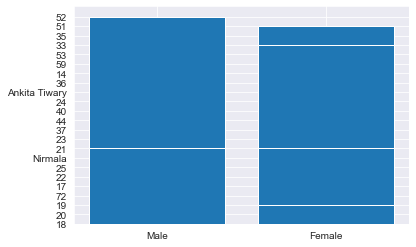

In [ ]:
# ploting Gender and Age on plt.bar
plt.bar(dataFrame['Gender'],dataFrame['Age'])

In [ ]:
#dropping the non-integer value from age
#creating the containing names for the age
names = ['Nirmala','Ankita Tiwary',"'19"]
for name in names:
    dataFrame.drop(dataFrame.index[dataFrame['Age'] == name], inplace=True)
#converting the age variable into int
dataFrame.Age = dataFrame['Age'].astype(int) 

<BarContainer object of 199 artists>

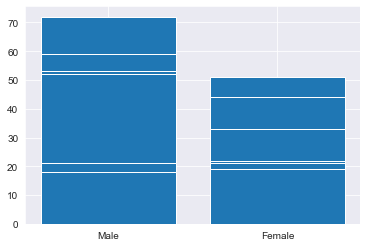

In [ ]:
# ploting Gender and Age on plt.bar
plt.bar(dataFrame['Gender'],dataFrame['Age'])

In [ ]:
#Exploring the state column
dataFrame['State'].value_counts()

Delhi               75
Haryana             56
Uttar Pradesh       21
Masharastra          9
Bihar                7
Rajasthan            4
Kerala               4
Tamil Nadu           4
Uttarakhand          3
Punjab               3
Gujarat              3
Himachal Pradesh     2
Jharkhand            2
Madhya Pradesh       1
West Bengal          1
Telangana            1
Nagaland             1
Assam                1
Andhra Pradesh       1
Name: State, dtype: int64

<div style="color:#5eaaa8;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: black;
           font-size:15px;
           letter-spacing:0.5px">
<b>📝 Note:</b> After checking the State column we found that most of the audience belong to only 4-5 States. It does not make sense to use all the states in model building as the data is limited.
    So, I have grouped the state with count less than 4 in other column.
</div>

In [ ]:
state_count = dataFrame['State'].value_counts()

In [ ]:
len(state_count[state_count<4])
state_count_lessthan4 = state_count[state_count<4]

In [ ]:
dataFrame['State'] = dataFrame['State'].apply(lambda x: 'other' if x in state_count_lessthan4 else x)

In [ ]:
dataFrame['State'].value_counts()

Delhi            75
Haryana          56
Uttar Pradesh    21
other            19
Masharastra       9
Bihar             7
Tamil Nadu        4
Kerala            4
Rajasthan         4
Name: State, dtype: int64

In [ ]:
dataFrame.head(10)

,Age,Gender,State,Tier,Favourite Category,Electronics,Fashion,Subscription,Books Category,Fiction,Non-Fiction
0,18,Male,Haryana,3,Fashion,Mobile Phones and accessories,Footwears,OTT Platforms,Fiction,Science Fiction,NaN
1,18,Female,Delhi,1,Books,"Laptop, Desktop and Tablets",Clothing,OTT Platforms,Fiction,Suspense and thriller,NaN
2,20,Male,Delhi,1,Fashion,Mobile Phones and accessories,Footwears,OTT Platforms,Fiction,Suspense and thriller,NaN
3,19,Female,Haryana,3,Fashion,"Earphone, Headphone or Speakers",Footwears,OTT Platforms,Fiction,Suspense and thriller,NaN
4,18,Female,Uttar Pradesh,1,Fashion,Mobile Phones and accessories,Jewellery,E-commerce Platforms,Non-Fiction,NaN,Autobiography & Biography
5,18,Male,Uttar Pradesh,2,Fashion,Mobile Phones and accessories,Footwears,OTT Platforms,Non-Fiction,NaN,Self Help
6,19,Male,Haryana,2,Fashion,Mobile Phones and accessories,Clothing,OTT Platforms,Fiction,Suspense and thriller,NaN
7,18,Female,Uttar Pradesh,2,Fashion,Mobile Phones and accessories,Clothing,OTT Platforms,Non-Fiction,NaN,Business and economics
8,19,Male,Haryana,3,Fashion,Mobile Phones and accessories,Footwears,OTT Platforms,Non-Fiction,NaN,Autobiography & Biography
9,19,Male,other,1,Books,Mobile Phones and accessories,Clothing,OTT Platforms,Non-Fiction,NaN,Business and economics


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 200
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 199 non-null    int32 
 1   Gender              199 non-null    object
 2   State               199 non-null    object
 3   Tier                199 non-null    int64 
 4   Favourite Category  199 non-null    object
 5   Electronics         199 non-null    object
 6   Fashion             199 non-null    object
 7   Subscription        199 non-null    object
 8   Books Category      199 non-null    object
 9   Fiction             108 non-null    object
 10  Non-Fiction         91 non-null     object
dtypes: int32(1), int64(1), object(9)
memory usage: 27.9+ KB


<div style="color:#5eaaa8;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: black;
           font-size:15px;
           letter-spacing:0.5px">
<b>📝 Note:</b> After cleaning the data, the last steps left to Data Preprocessing is to encode the categorical variables and Normalisation of the data.
    But before performing these steps lets do some EDA & Data Visualisation.
</div>

<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           font-size:15px;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
<h3 style="font-size: 20px; color: #5eaaa8">2. Exploratory Data Analysis</h3>
    <p style="font-family: 'Poppins', sans-serif; font-size: 16px;">
Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.
 </p>
</div>

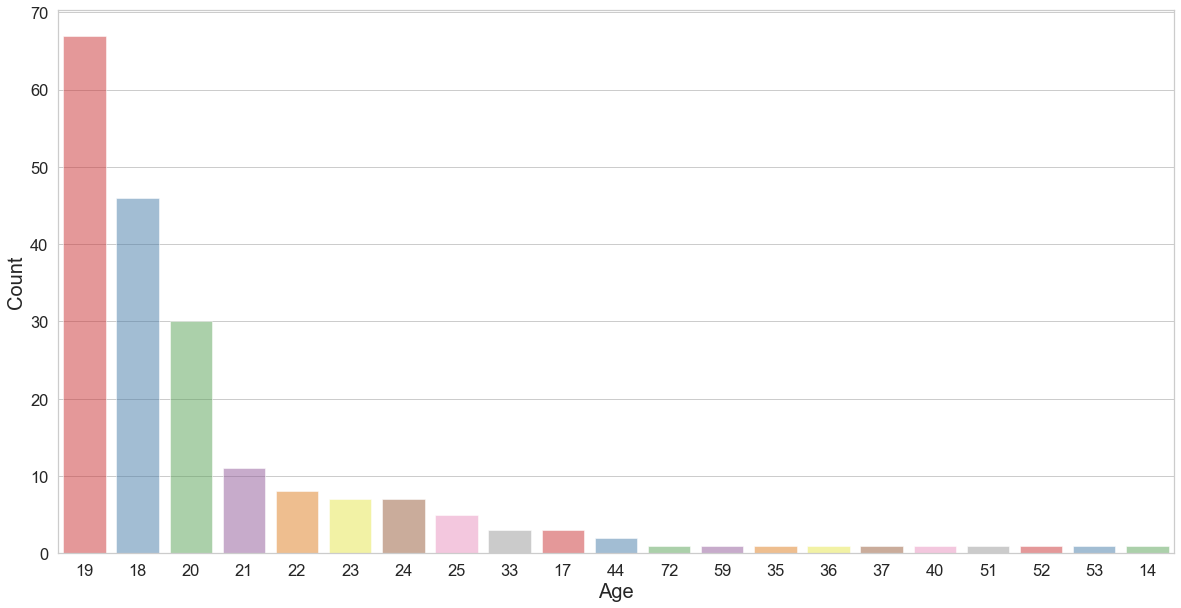

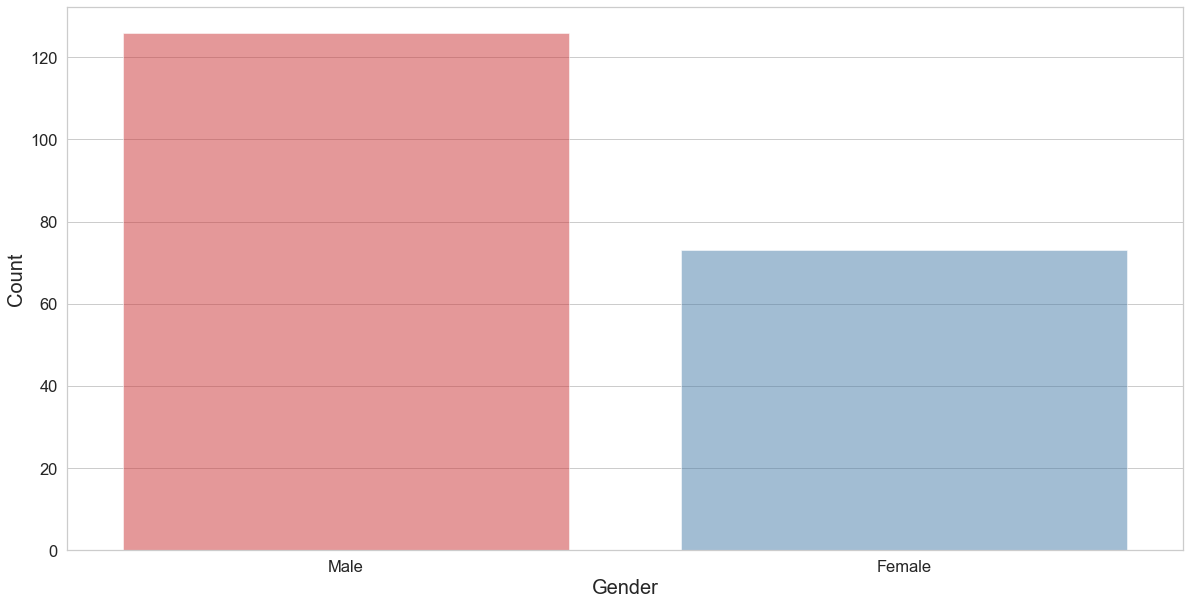

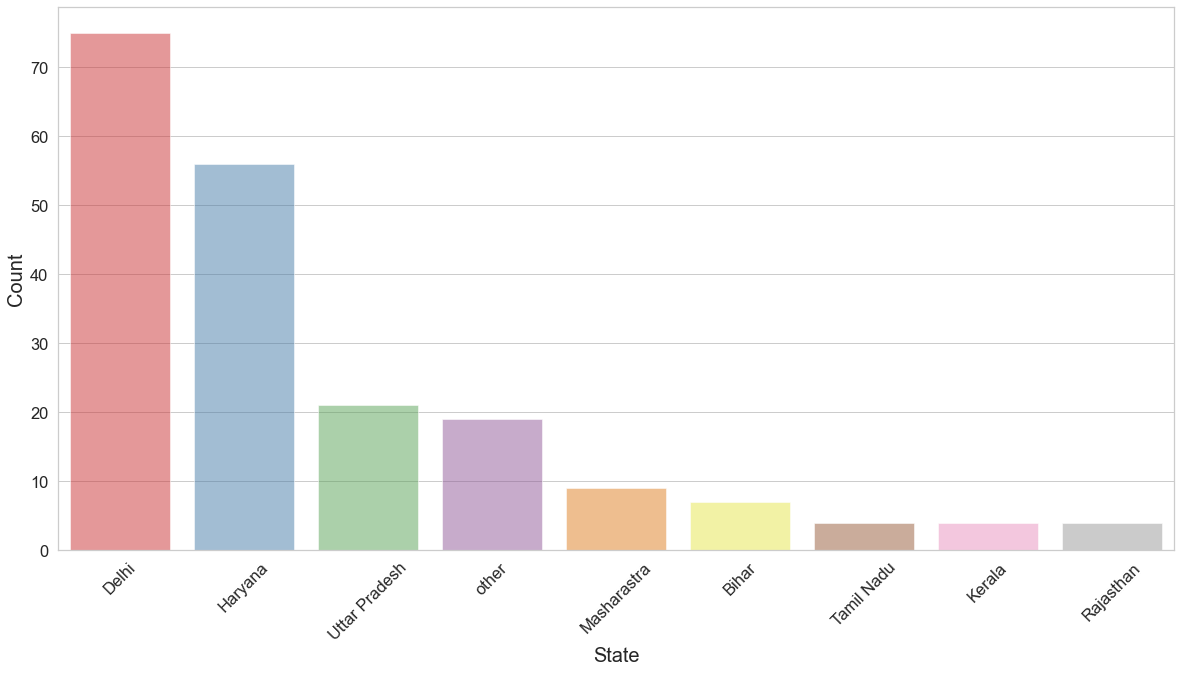

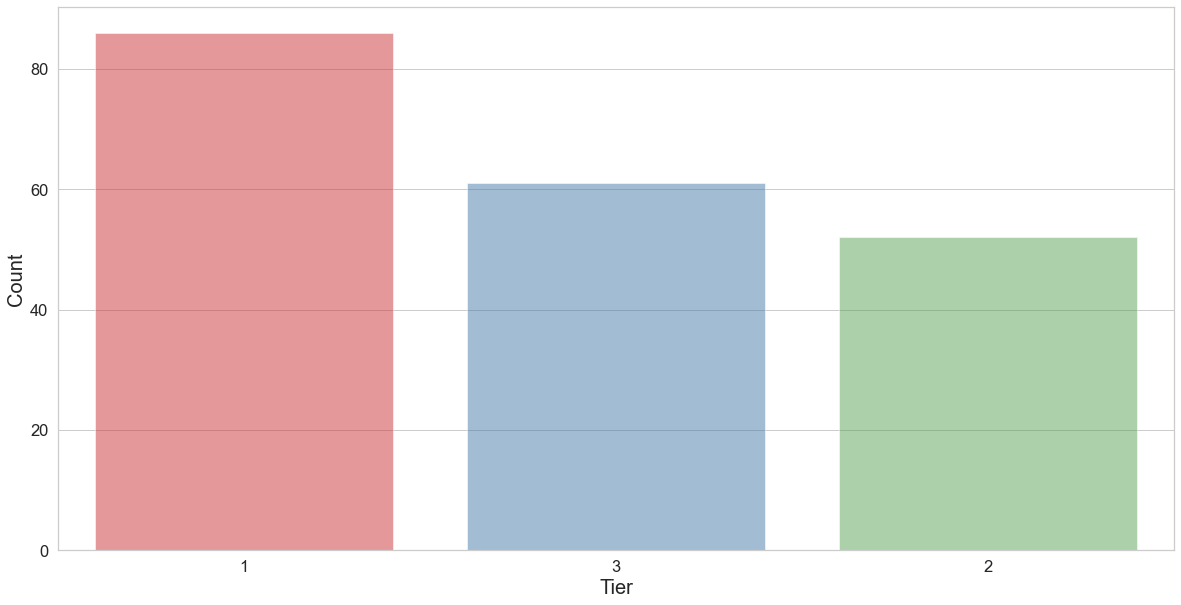

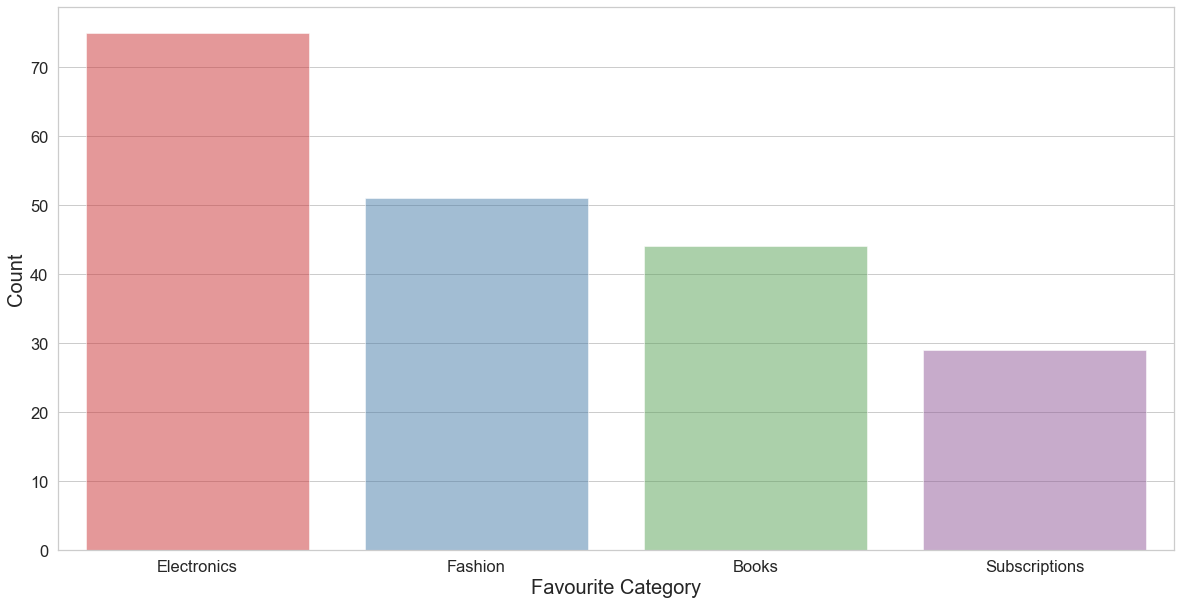

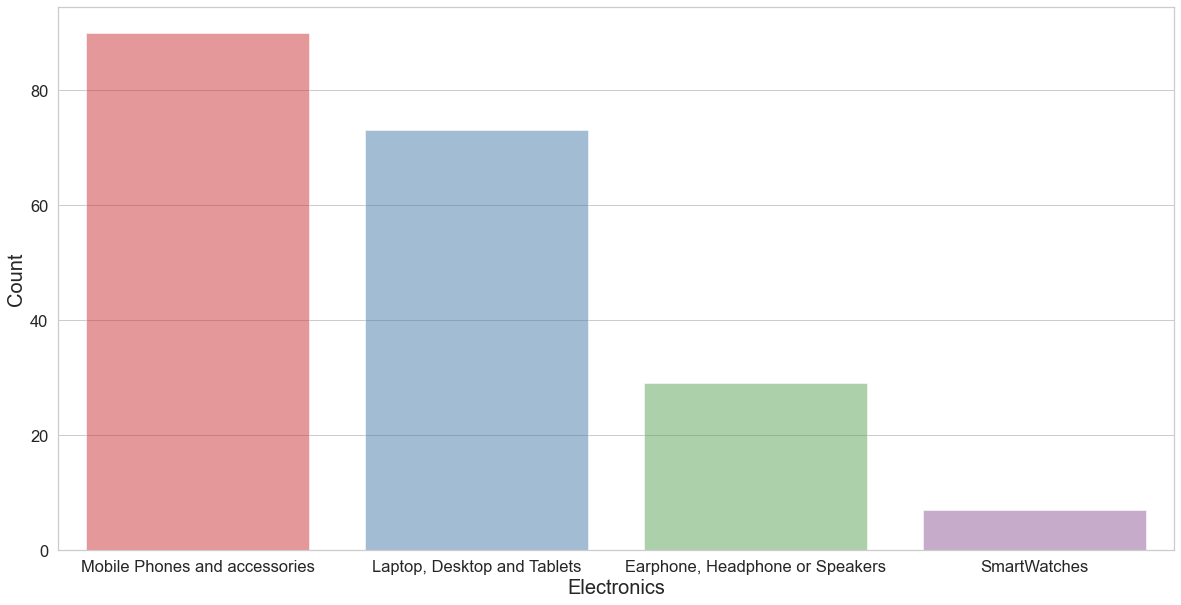

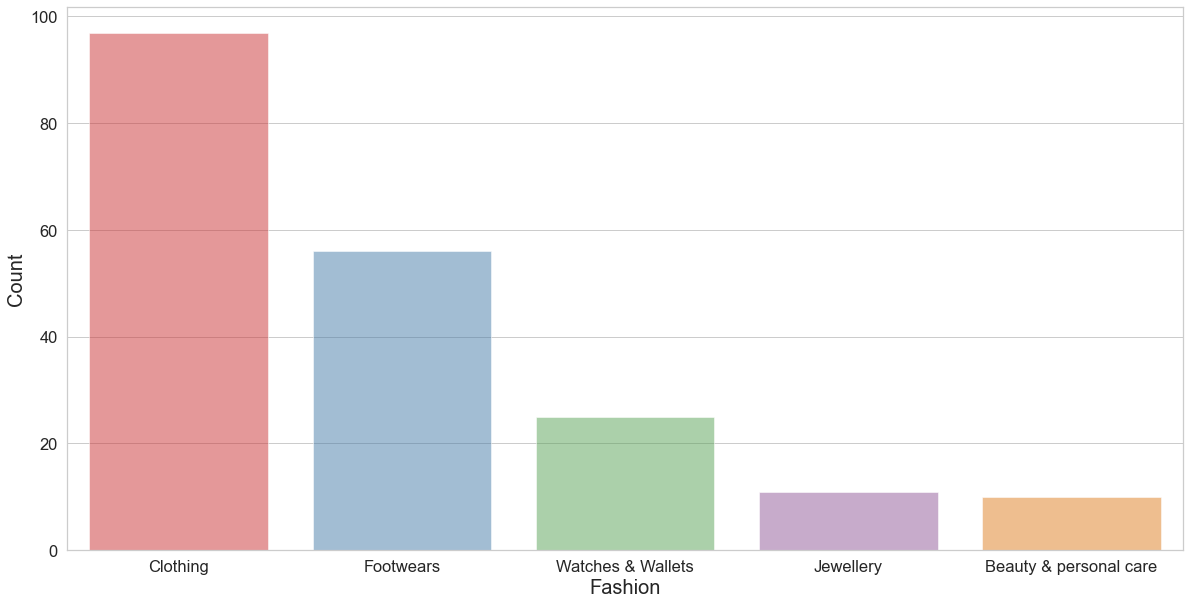

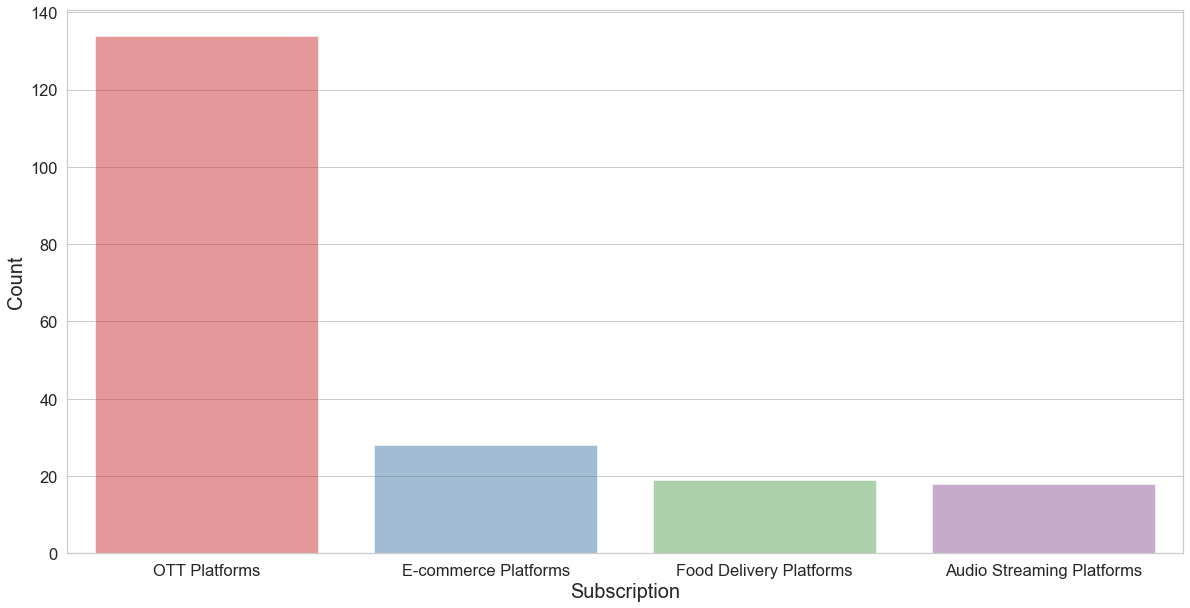

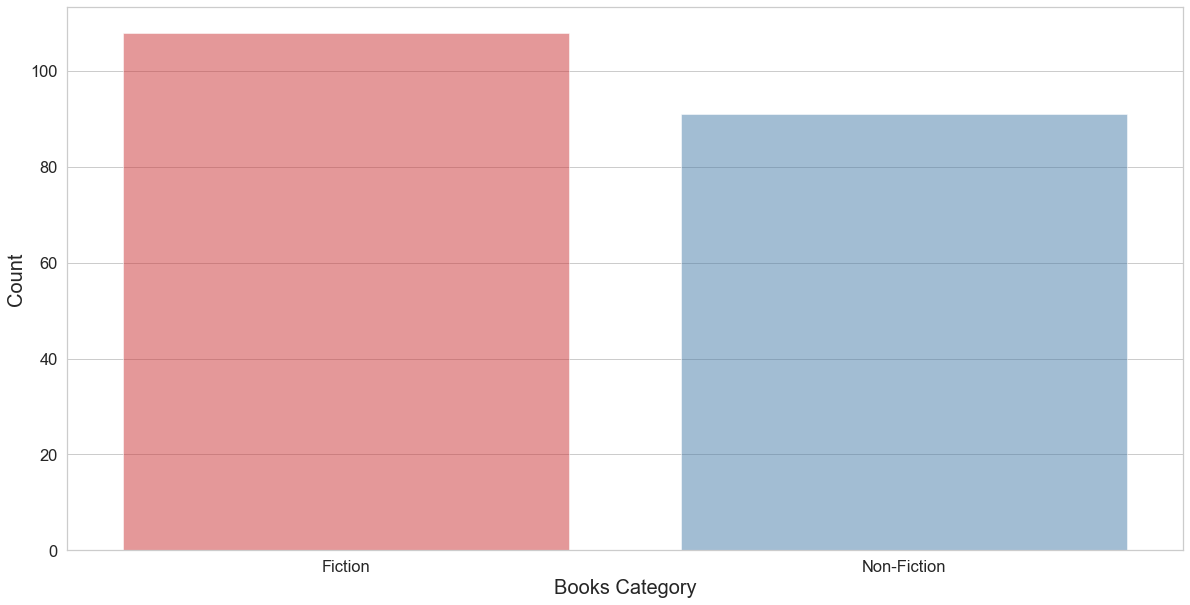

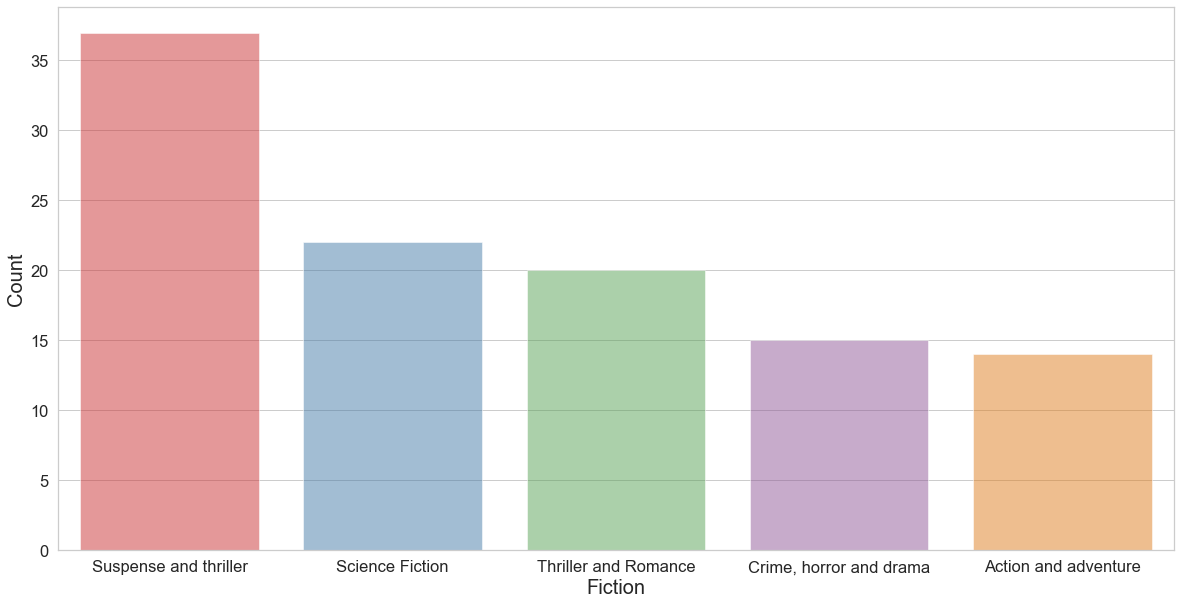

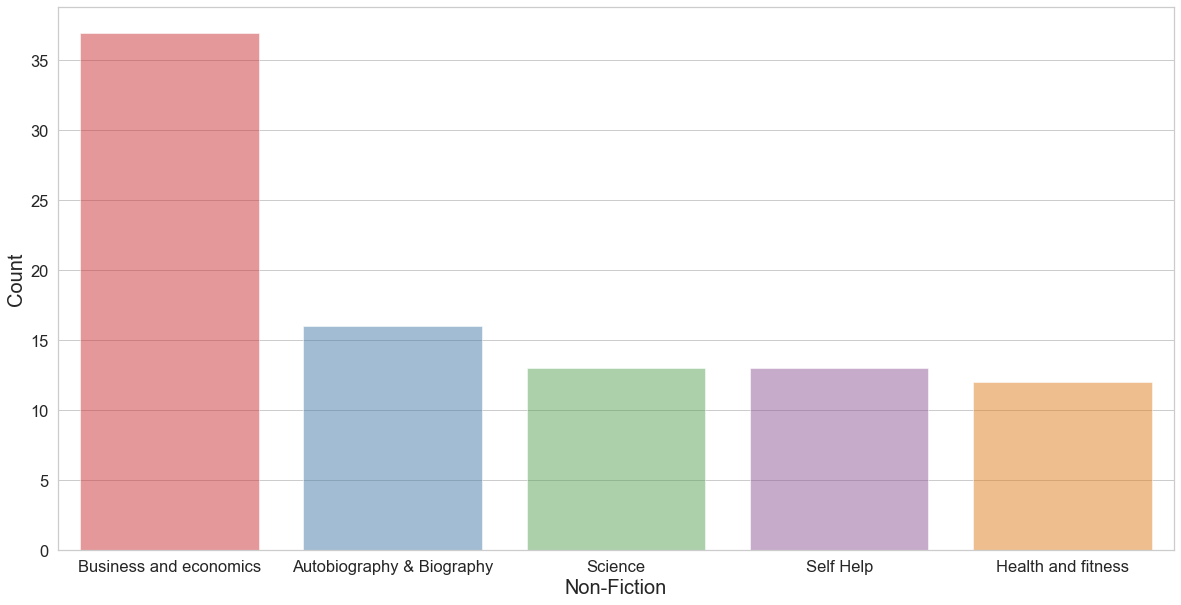

In [ ]:
# ploting the count of every column
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style("whitegrid")
sns.set_palette("Set1")
for column in dataFrame.columns:
    sns.countplot(x=column, data=dataFrame, palette="Set1" , order=dataFrame[column].value_counts().index , alpha=0.5)
    if column == 'State':
        plt.xticks(rotation=45)
    plt.xlabel(column, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.show()

<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           font-size:15px;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500; color: #5eaaa8">Interpretations from the above countplots</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Majority of our audience is from Age group 19,18 and 20</li>
    <li>Majority of the audience is from Delhi and Haryana.</li>
    <li>Number of males is greater than females.</li>
    <li>Majority prefer electronics as their favourite category.</li>
    <li>Around 50% of the audience likes clothing in Fashion category.</li>
    <li>Majority prefers OTT as their favourite subscription.</li>
    <li>Most of the audience likes Business and economics in Non-Fiction category.</li>
    <li>Most of the audience likes Suspense and thriller in Fiction category</li>
</ul>
    </div>

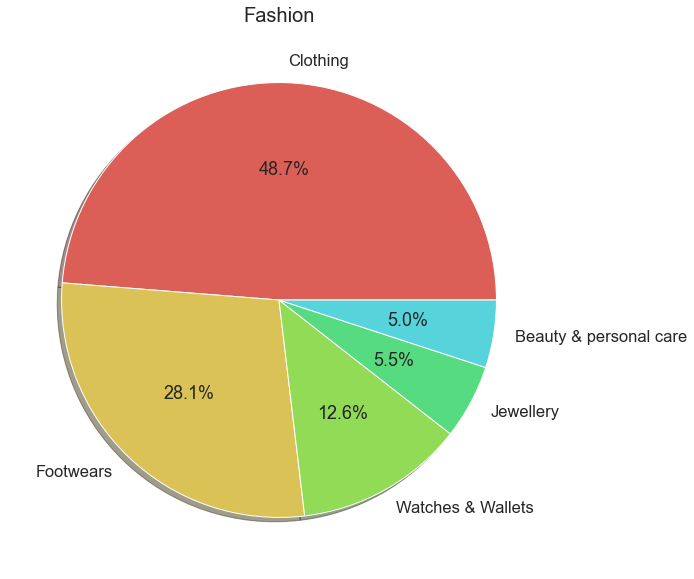

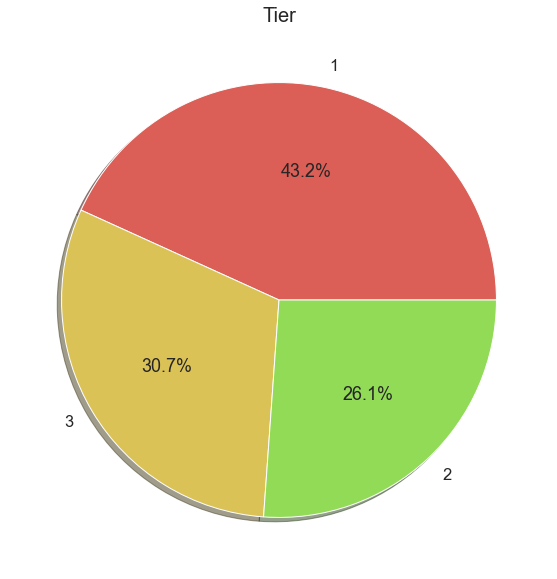

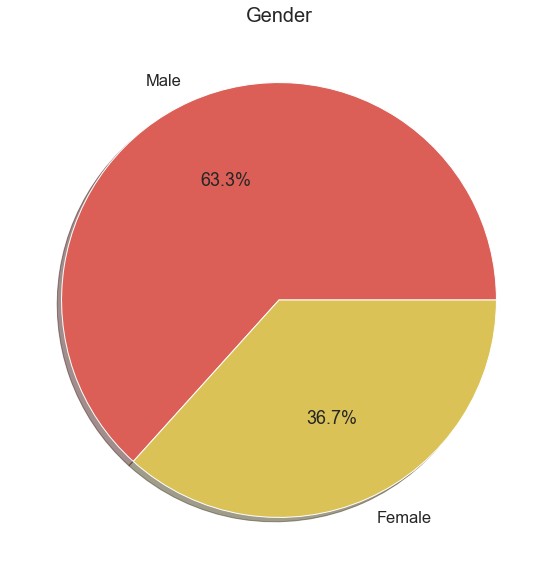

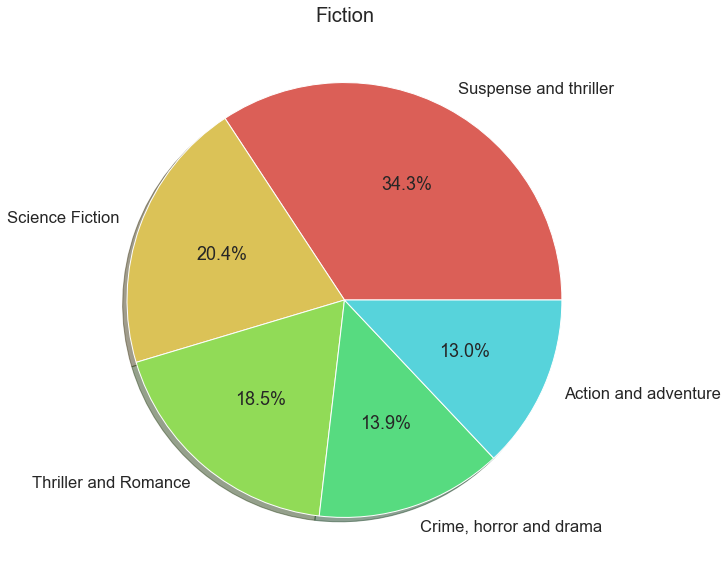

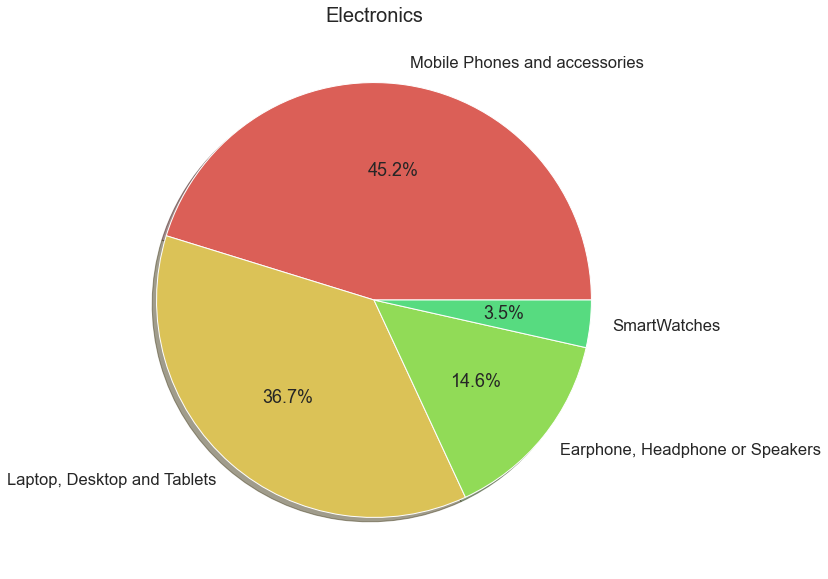

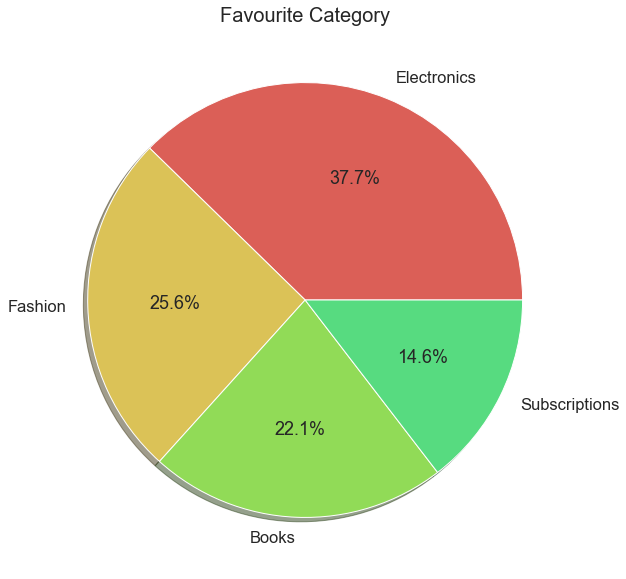

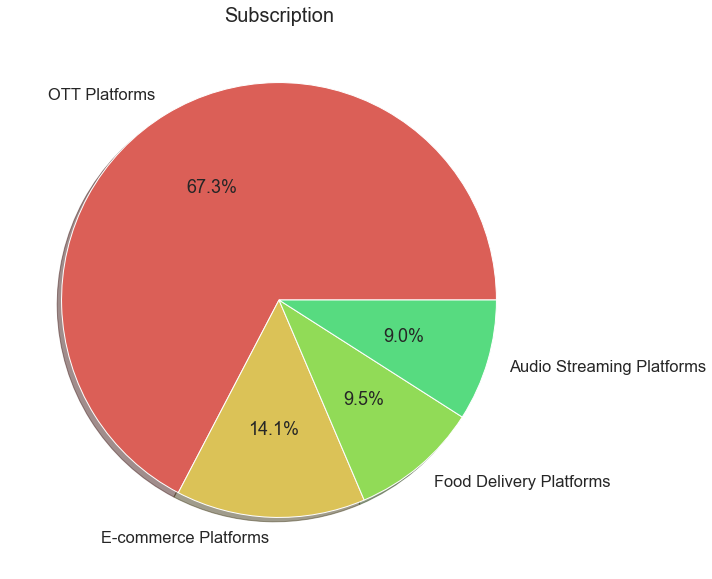

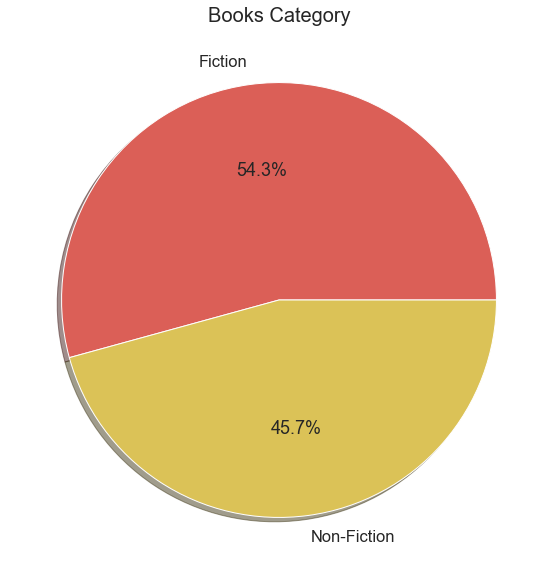

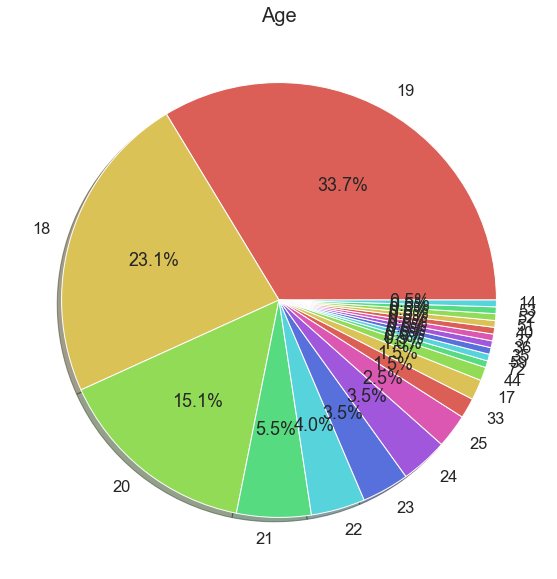

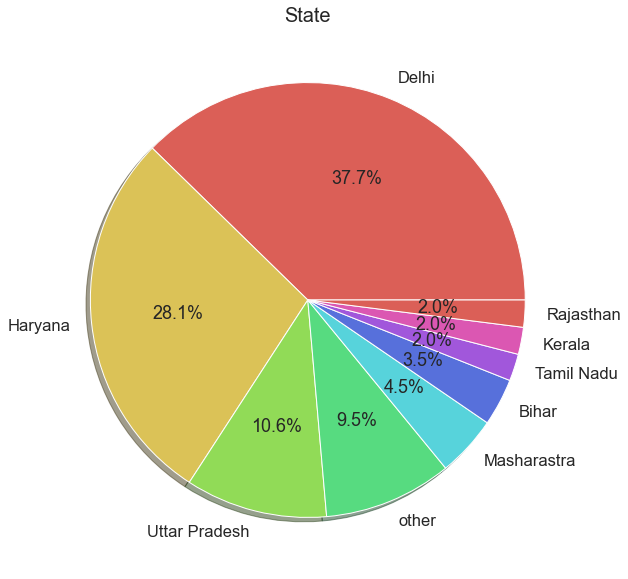

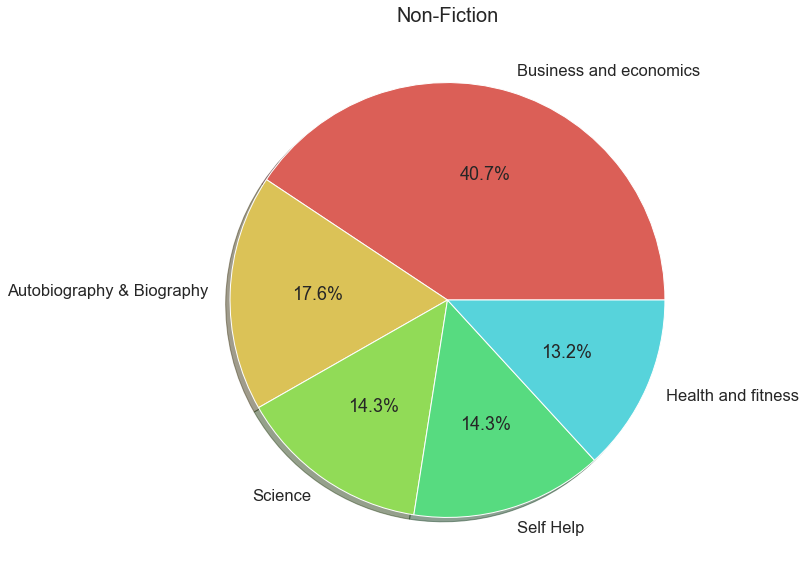

In [ ]:
columns_list = set(dataFrame.columns.values.tolist());
plt.rcParams["figure.figsize"] = (20,10)
for x in columns_list:
    dataFrame[x].value_counts().rename("").plot(kind='pie', autopct='%1.1f%%',shadow=True, colors=sns.color_palette("hls", 8))
    plt.title(x, fontsize=20)
    plt.show()

<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           font-size:15px;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500; color: #5eaaa8">Interpretations from the above Pie charts</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Among Fiction Category Suspense and Thriller books have majority share.(34%)</li>
    <li>Among Non-Fiction Category Business and Economics books have the majority share.(40%)</li>
    <li>In Fashion Category around 50% of the people like clothing.</li>
    <li>Mobile(45%) and Laptop(36%) category has majority share in Electronics.</li>
    <li>Around 2/3rd of people like OTT Platforms in subscription.</li>
    <li>Majority of people chose Electronics(37%) as their favourite category.</li>
</ul>
    </div>

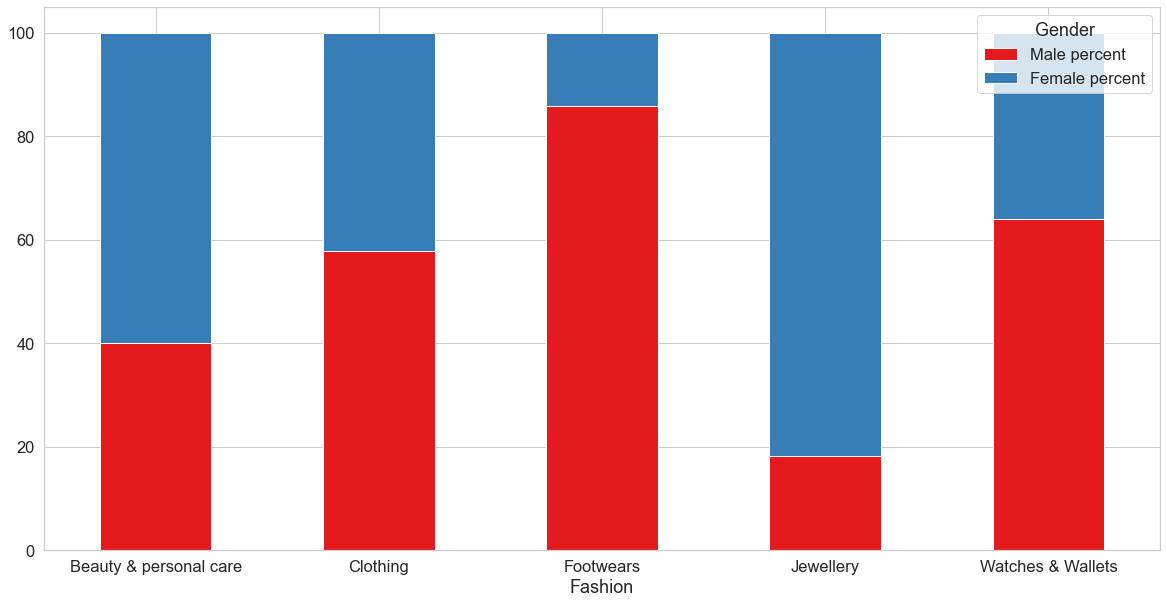

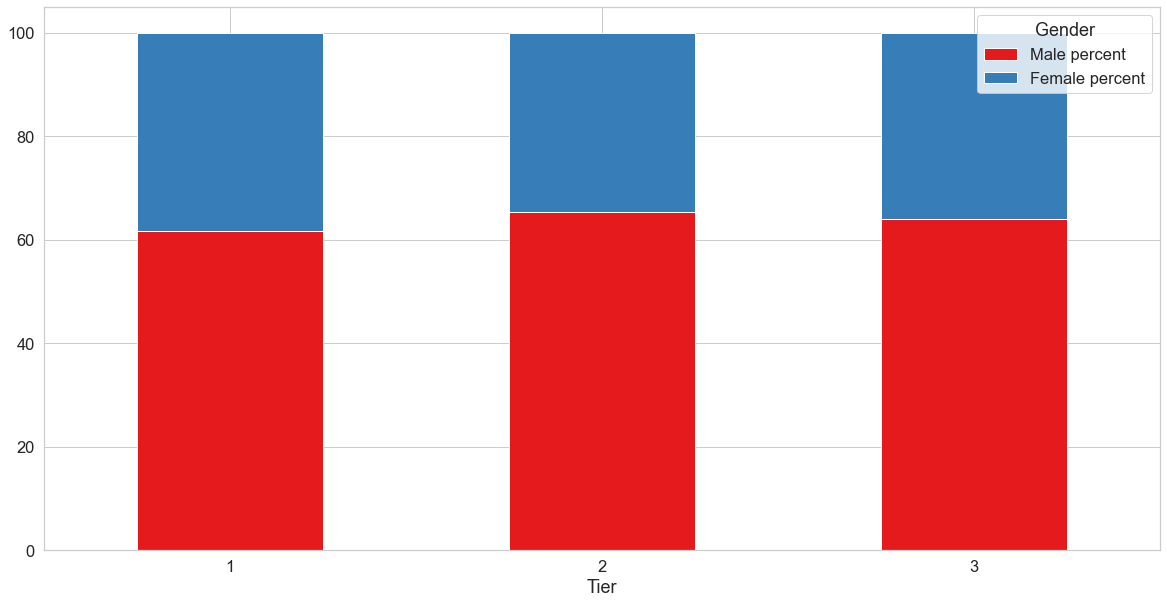

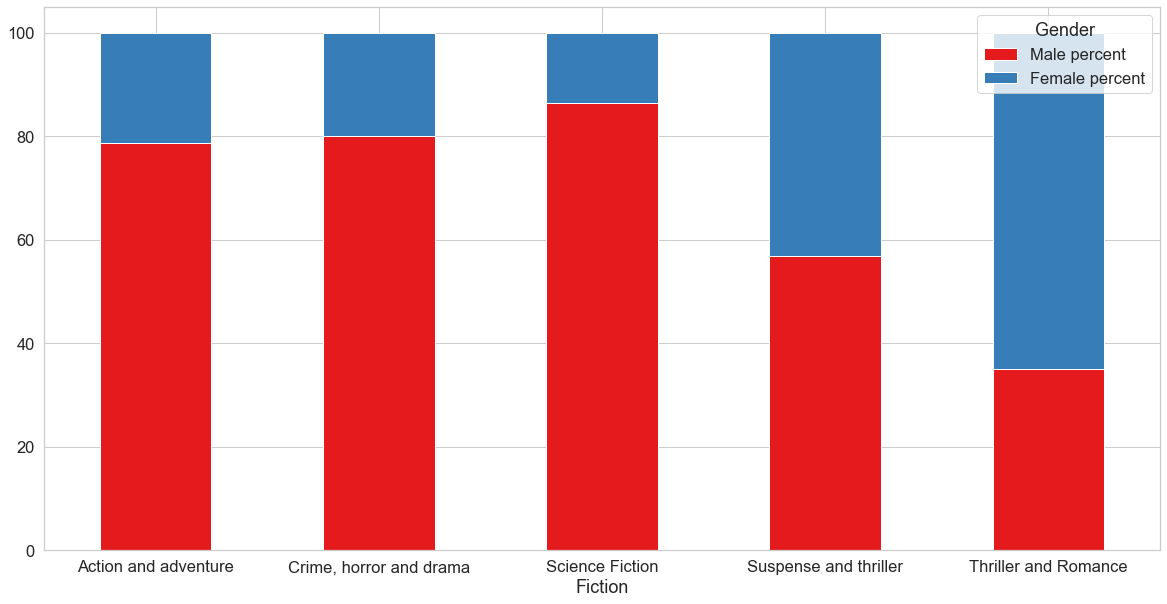

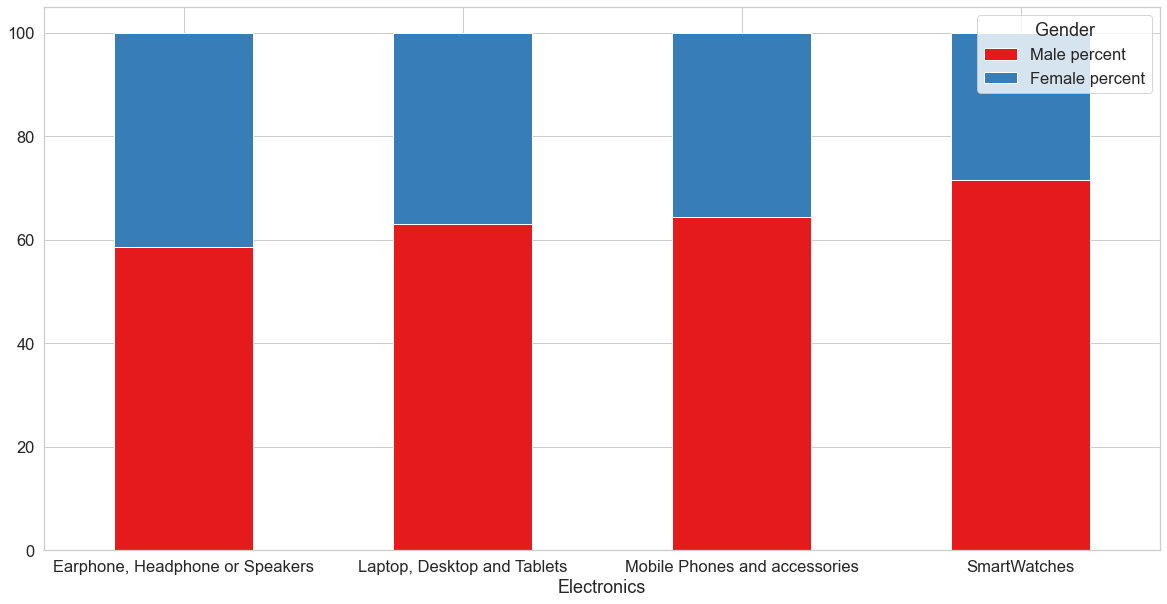

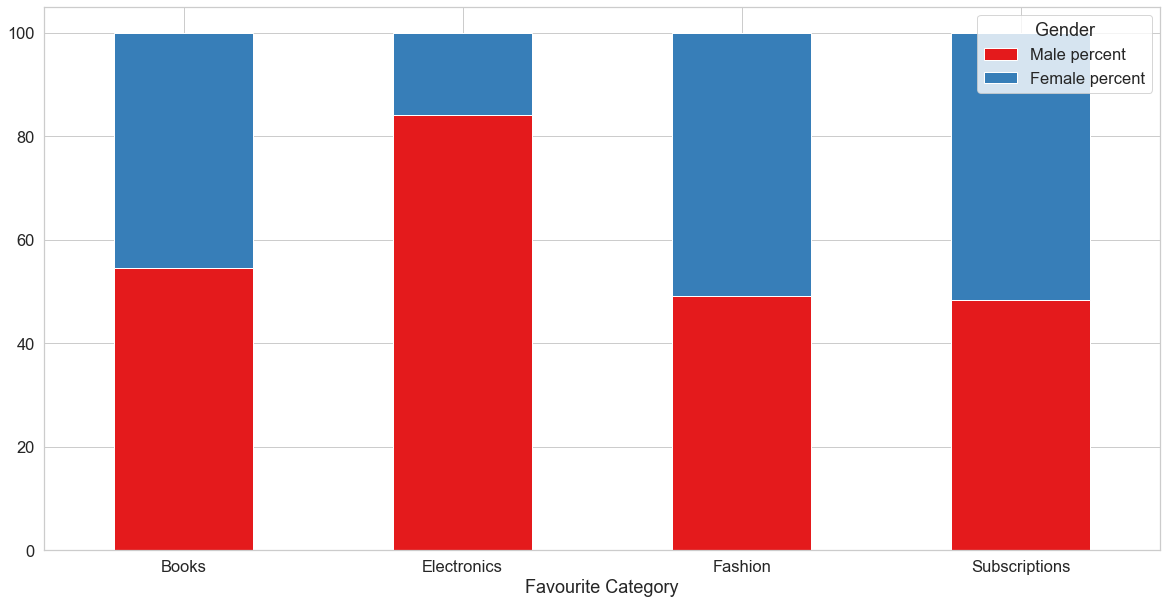

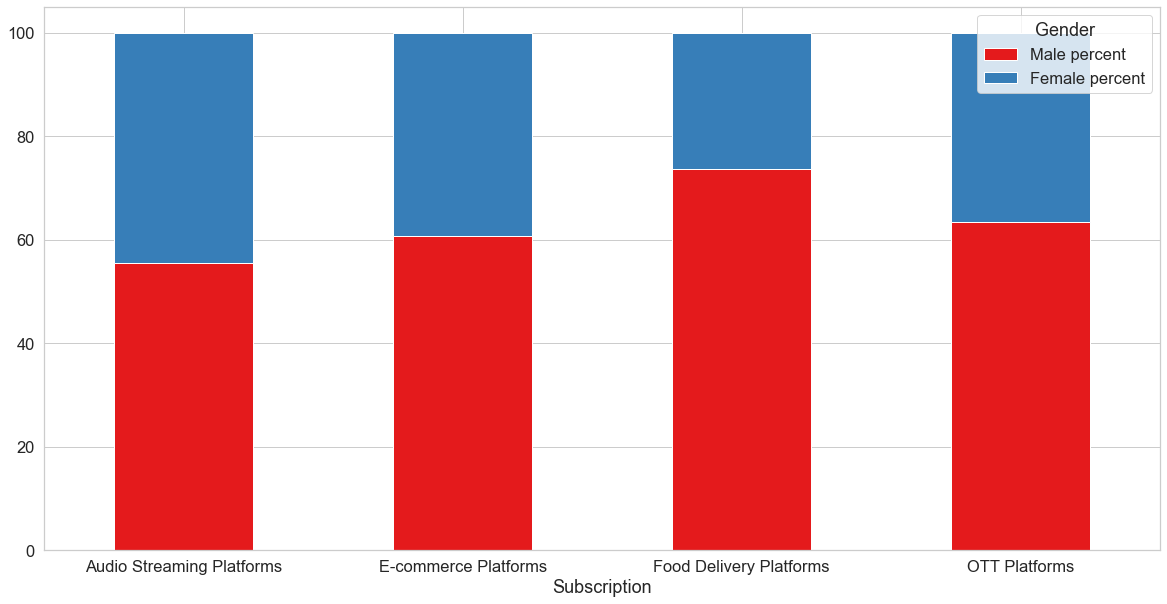

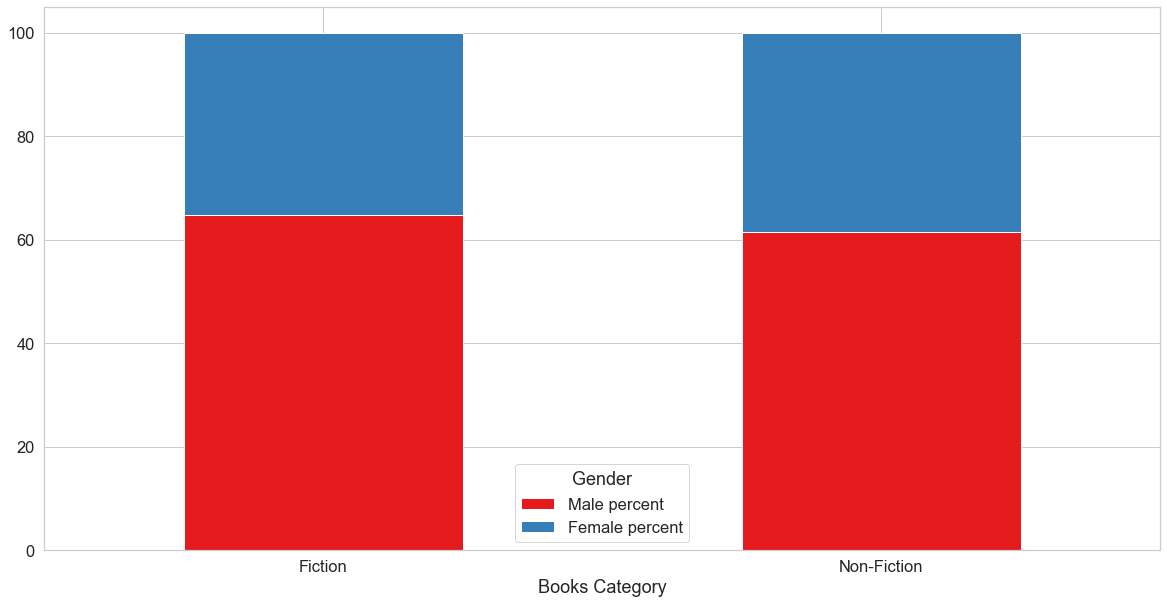

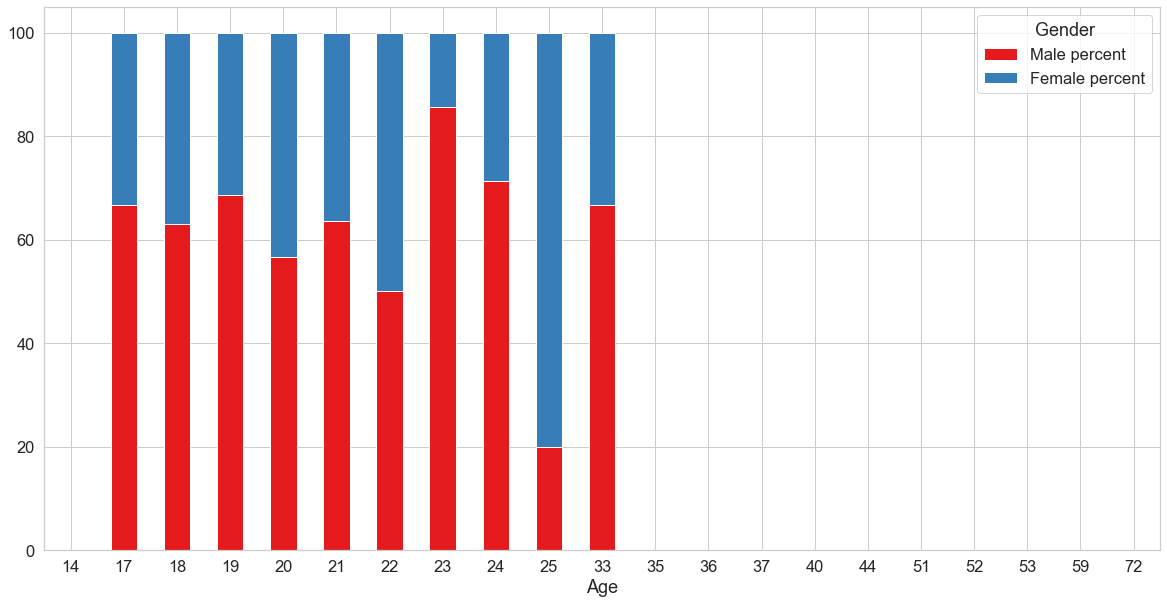

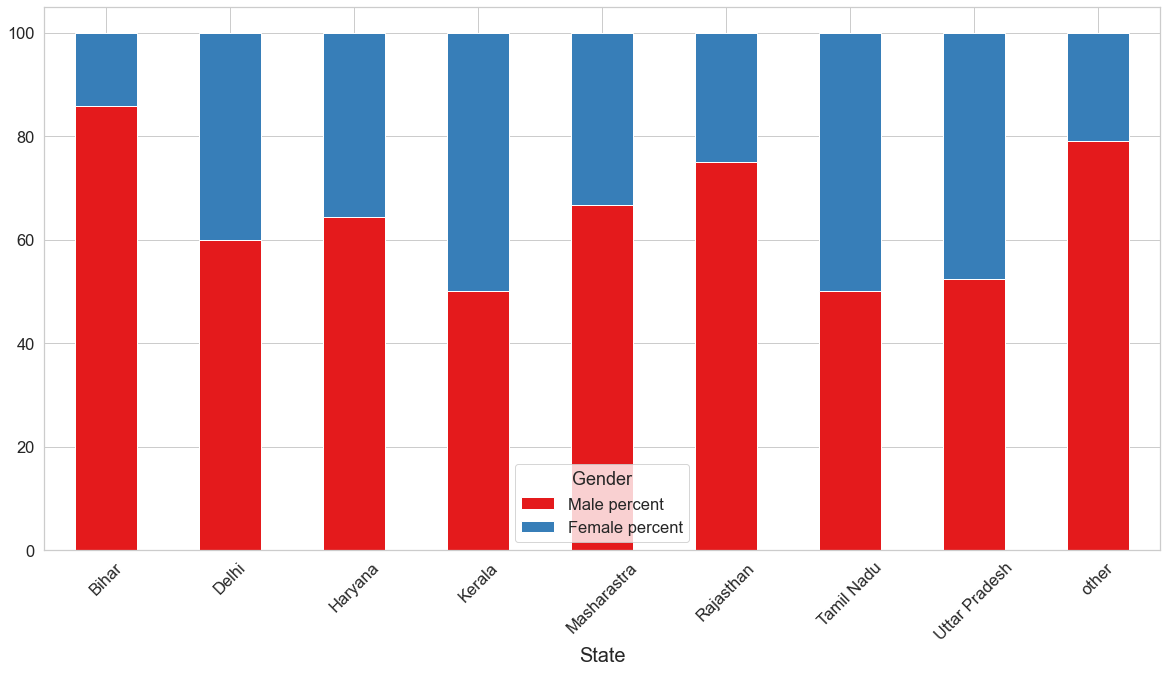

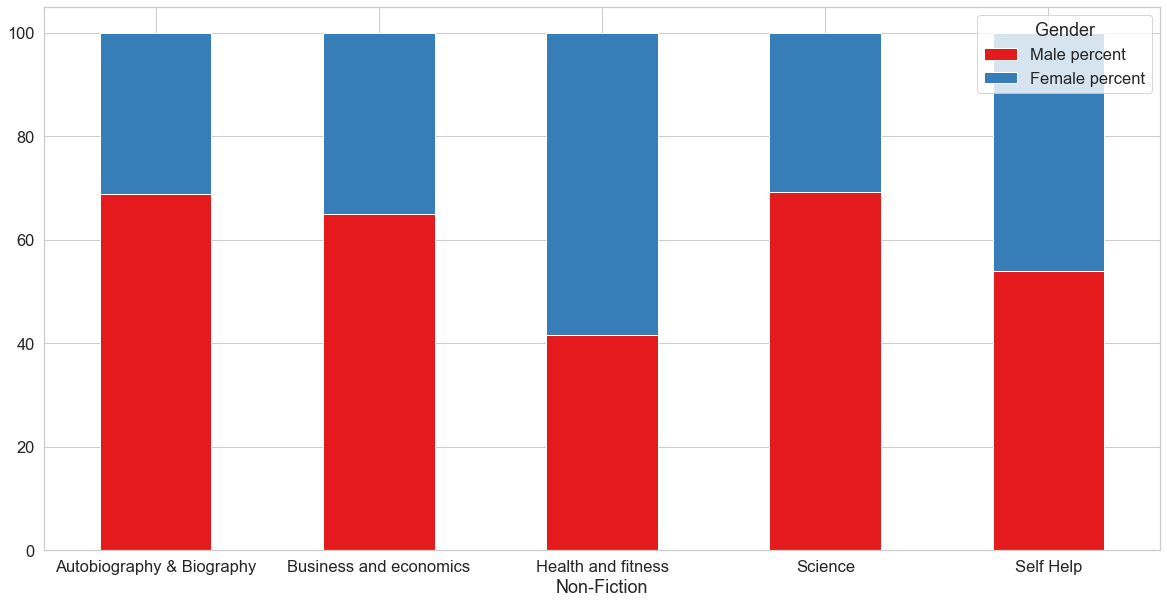

In [ ]:
#exploring the gender in every field
remove_column = set(["Gender",'Female','Male'])

final_list = list(columns_list - remove_column)
for x in final_list:
    Gender = pd.get_dummies(dataFrame['Gender'])
    df1 = pd.concat([dataFrame, Gender], axis = 1)
    df2 = df1.groupby([x,'Gender'])['Male'].sum().unstack()
    df3 = df1.groupby([x,'Gender'])['Female'].sum().unstack()
    df3['Male'] = df2['Male']
    df3['total'] = df3['Male']+df3['Female']
    df3['Male percent']= (df3['Male']/df3['total']) *100
    df3['Female percent']=(df3['Female']/df3['total'])*100
    df3.drop(['Male','Female','total'], axis =1 ,inplace= True)
    df3.plot(kind='bar', stacked = True)
    if x == 'State':
        plt.xticks(rotation=45)
        plt.xlabel(x, fontsize=20)
    else:
        plt.xticks(rotation=0)
    plt.show()

<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           font-size:15px;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500; color: #5eaaa8">Interpretations from the above stacked charts</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Females are more intended towards health and fitness than males.</li>
    <li>Females are mostly likely to love Thriller and Romance books than males.</li>
    <li>Females are more likely to like jewellery than males.</li>
    <li>Male are more likely to like footwears then females.</li>
    <li>Males are more intended towards Electronics products than females.</li>
    <li>Science fiction,crime and action books are mostly liked by males.</li>
    <li>Beauty and personal care products are mostly liked by females.</li>
    <li>Suspense and Thriller categories is equaly liked by both genders.</li>
</ul>
    </div>

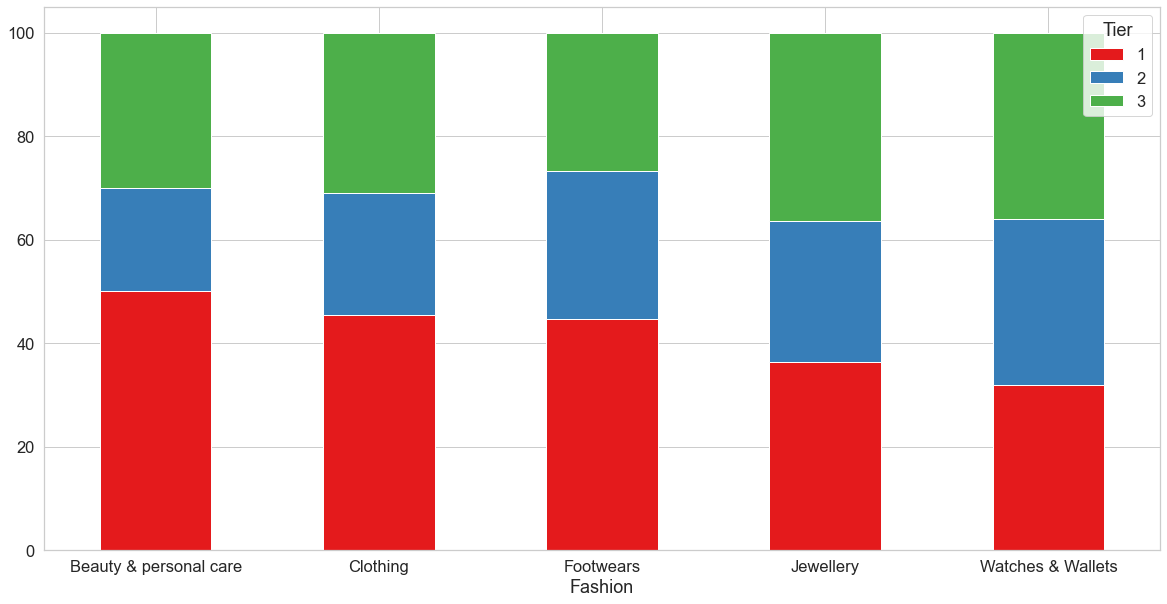

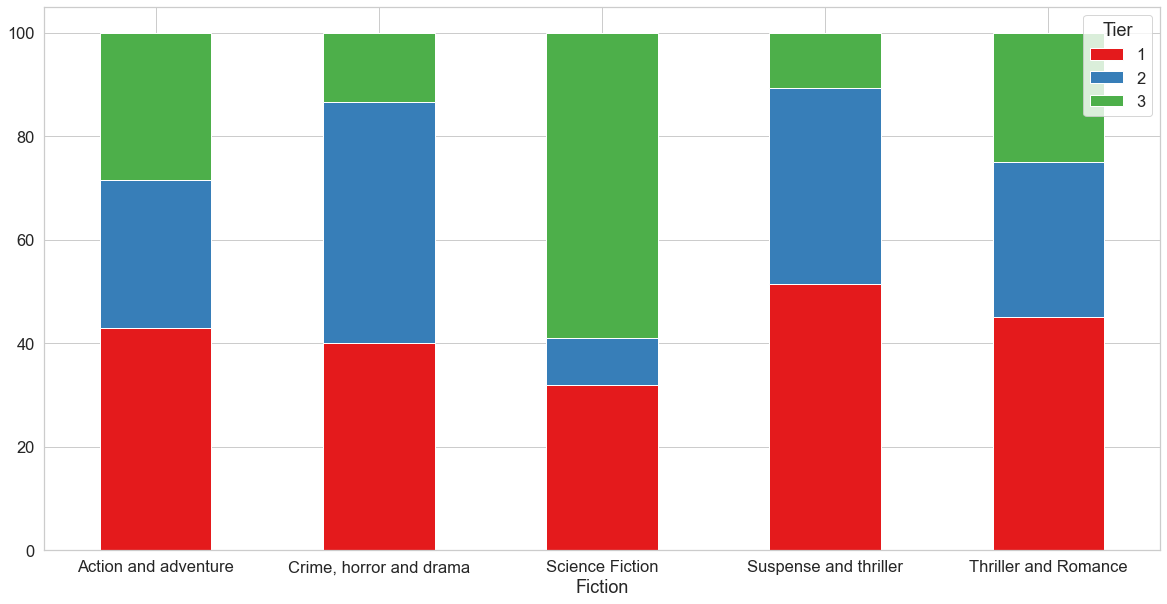

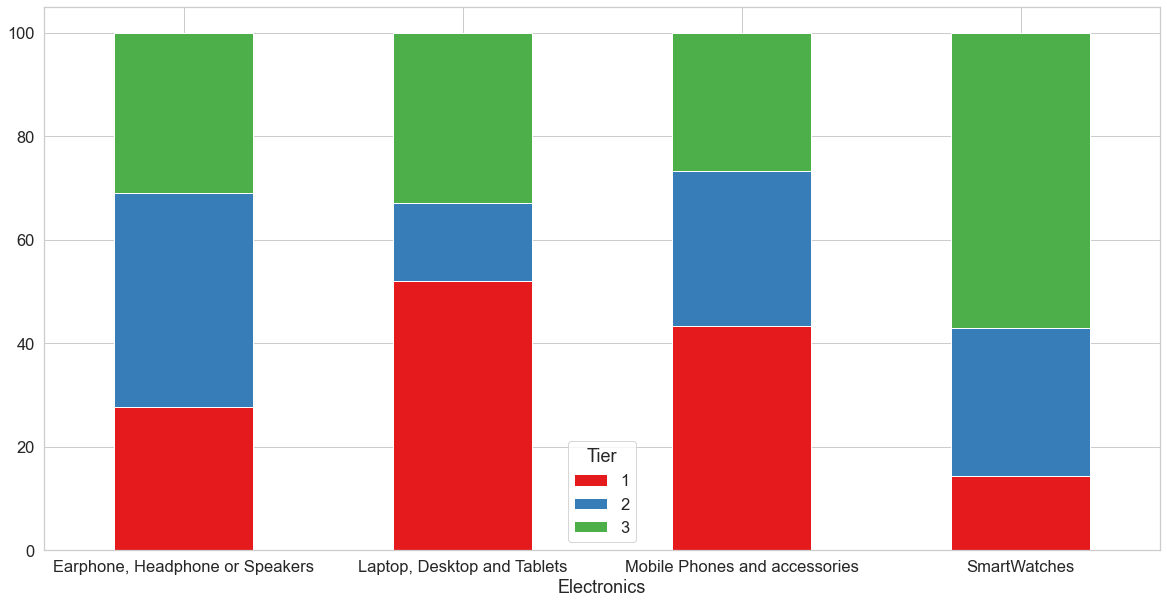

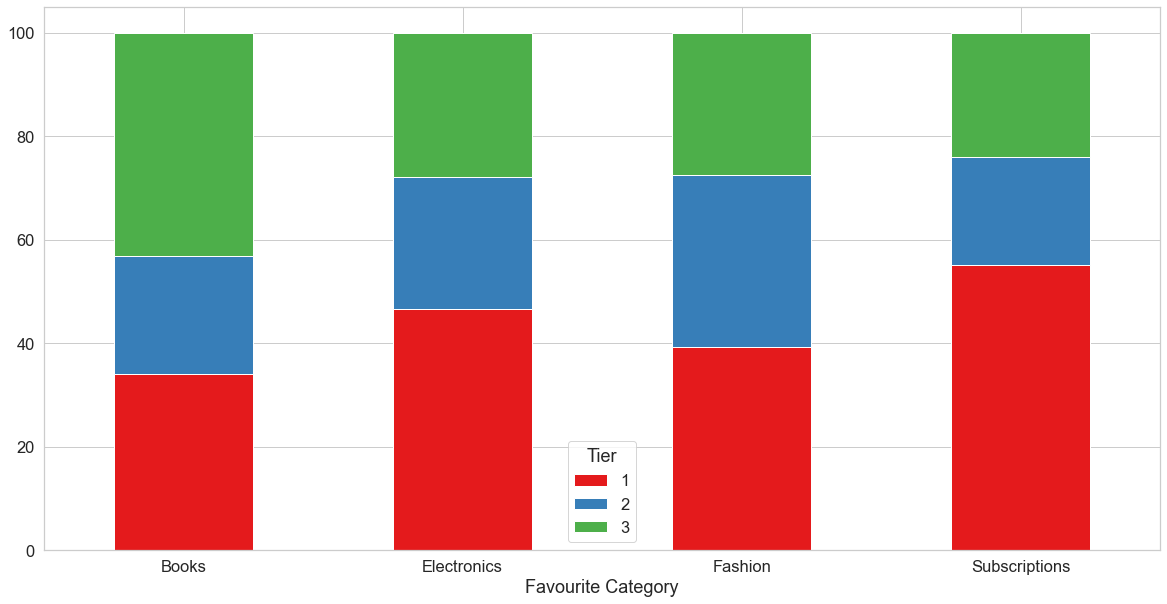

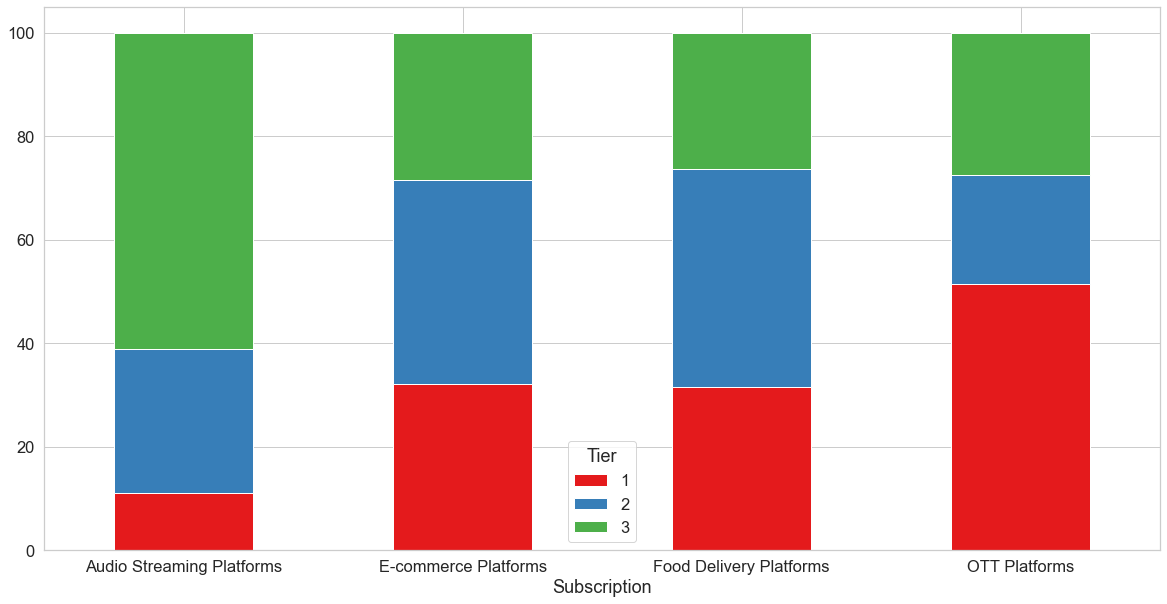

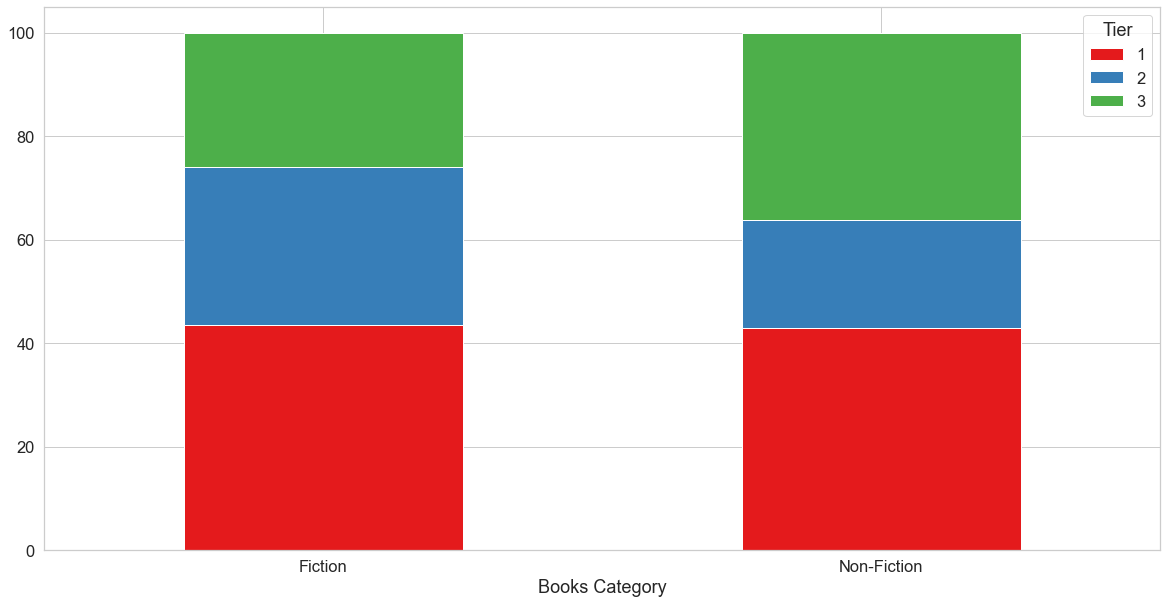

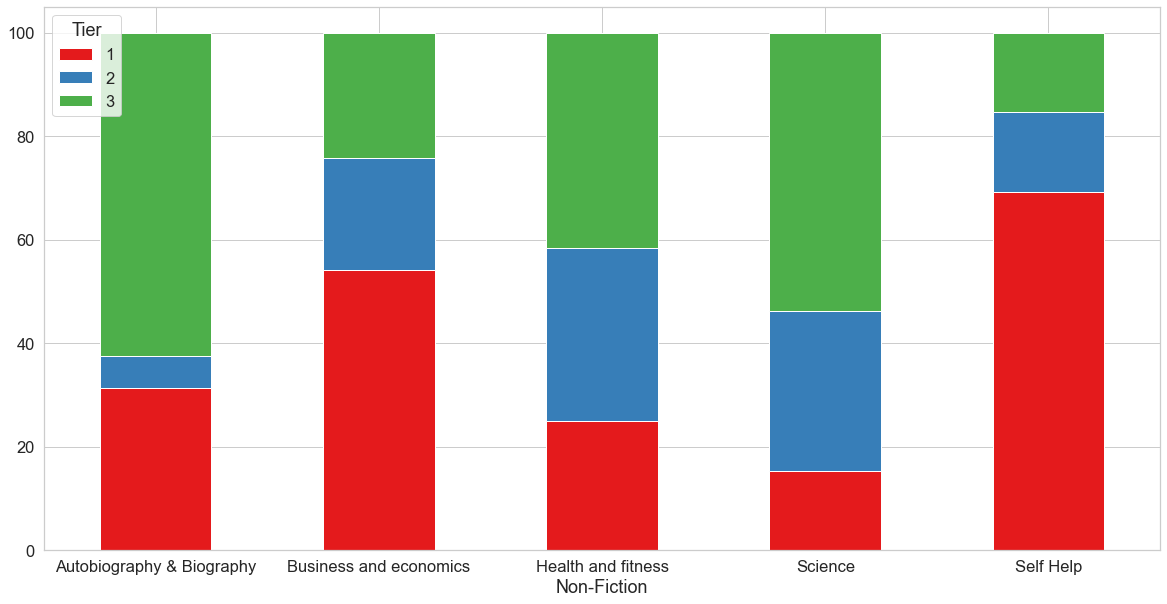

In [ ]:
columns_list = set(dataFrame.columns.values.tolist()); 
remove_column = set(["Gender",'Age' , 'Tier','State',''])
final_list = list(columns_list - remove_column)
for x in final_list:
    Tier = pd.get_dummies(dataFrame['Tier'])
    df1 = pd.concat([dataFrame, Tier], axis = 1)
    df2 = df1.groupby([x,'Tier'])[1].sum().unstack()
    df3 = df1.groupby([x,'Tier'])[2].sum().unstack()
    df4 = df1.groupby([x,'Tier'])[3].sum().unstack()
    df4[1] = df2[1]
    df4[2] = df3[2]
    df4['total']= df4[1]+df4[2]+df4[3]
    df4[1]= (df4[1]/df4['total'])*100
    df4[2]= (df4[2]/df4['total'])*100
    df4[3]= (df4[3]/df4['total'])*100
    df4.drop('total', axis =1 , inplace = True)
    df4.plot(kind='bar', stacked = True)
    plt.xticks(rotation=0)  
    plt.xticks(rotation=0)
    plt.show()

<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           font-size:15px;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
<h3 style="font-family: 'Poppins', sans-serif; font-size: 20px; font-weight: 500; color: #5eaaa8">Interpretations from the above stacked charts</h3>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>People from Tier 3 are more attracted by books.</li>
    <li>(55%) Subscriptions are mostly liked by people from tier 1.</li>
    <li>Fashion Products are equaly liked by people from each tier.</li>
    <li>Tier 3 people mostly are more likely to be attracted by audio Streaming platforms.</li>
    <li>OTT platforms are are mostly liked by Tier 1 people.</li>
    <li>SmarthWatches are mostly liked by Tier 3 people.</li>
    <li>Tier 2 people are least attracted to latpop, desktop and tablets.</li>
    <li>Tier 1 people are most likely to be attracted by Beauty & personal care.</li>
</ul>
    </div>

<div style="color:#5eaaa8;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: black;
           font-size:15px;
           letter-spacing:0.5px">
<b>📝 Note:</b> After doing EDA and Data Visualisation we have come across some important conclusions.
    The last step in the model creation but before that we need to first do Categorical encoding.
</div>

In [ ]:
df2 = dataFrame.iloc[:,0:5]
Favourite_Category = pd.get_dummies(df2['Favourite Category'])
Gender = pd.get_dummies(df2.Gender , drop_first = True)
State = pd.get_dummies(df2.State)
df3 = pd.concat([df2.drop(['State','Gender','Favourite Category'] , axis = 1), Gender, State.drop('other' ,axis =1), Favourite_Category] , axis = 1)
df3

,Age,Tier,Male,Bihar,Delhi,Haryana,Kerala,Masharastra,Rajasthan,Tamil Nadu,Uttar Pradesh,Books,Electronics,Fashion,Subscriptions
0,18,3,1,0,0,1,0,0,0,0,0,0,0,1,0
1,18,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,20,1,1,0,1,0,0,0,0,0,0,0,0,1,0
3,19,3,0,0,0,1,0,0,0,0,0,0,0,1,0
4,18,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,18,1,1,0,1,0,0,0,0,0,0,0,1,0,0
197,18,1,1,0,1,0,0,0,0,0,0,0,0,1,0
198,18,3,0,0,0,1,0,0,0,0,0,1,0,0,0
199,21,1,0,0,1,0,0,0,0,0,0,0,1,0,0


<div style="color:#424949;
           display:fill;
           border-radius:10px;
           border-style: solid;
           border-color:#424949;
           text-align:center;
           font-size:15px;
           letter-spacing:0.5px;
           padding: 0.7em;
           text-align:left">  
<h3 style="font-size: 20px; color: #5eaaa8">3. Model Creation</h3>
    <p style="font-family: 'Poppins', sans-serif; font-size: 16px;">
Model Creation is the last step in a Data Science project which the right Machine Learning/Deep learning model with least error is choosen. The Historical data is divided among test data and train data.
        Training data is used in training the model and test data is used for validating the model.
        </p>
</div>

In [ ]:
#Dividing data into training data and test data
X = df3.iloc[:,0:11]
y = df3.iloc[:,11:15]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="color:#5eaaa8;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: black;
           font-size:15px;
           letter-spacing:0.5px">
<b>📝 Note:</b> Before using Deep learning, I tried several supervised classification Machine learning models since this is a classification problem. But, I didn't get the desired results. So, I chose deep learning to solve this classification problem.
</div>

In [ ]:
#importing the deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Performing gridSearch for finding the right layers, activation functions
def create_model(layers, activate):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=11, activation = activate))
    
        else:
            model.add(Dense(nodes , activation = activate))

    model.add(Dense(4, activation = 'softmax')) # Note: no activation beyond this point
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)
layers = [[24, 12, 6], [48, 24, 12, 6],[48, 36, 18, 12, 6]
activations = ['relu','sigmoid','linear']
param_grid = dict(layers=layers, activate=activations, epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, y)

In [ ]:
[grid_result.best_score_,grid_result.best_params_]

In [ ]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(48, activation='linear' , input_dim = 11))
	model.add(Dense(4,  activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
	return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=30, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)

In [ ]:
results.mean()

0.406842103600502

In [ ]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(48, activation='linear',input_dim = 11))
classifier.add(Dense(36, activation='linear'))
classifier.add(Dense(18, activation='linear'))
classifier.add(Dense(12, activation='linear'))
classifier.add(Dense(6, activation='linear'))
classifier.add(Dense(4, activation='softmax'))
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, epochs = 30)

In [ ]:
classifier.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 1.4826 - accuracy: 0.3750


[1.4826208353042603, 0.375]

In [ ]:
y_predict = classifier.predict(X_test)
y_predict = np.round(y_predict)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.81      0.62        16
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         9

   micro avg       0.50      0.33      0.39        40
   macro avg       0.12      0.20      0.15        40
weighted avg       0.20      0.33      0.25        40
 samples avg       0.33      0.33      0.33        40



C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


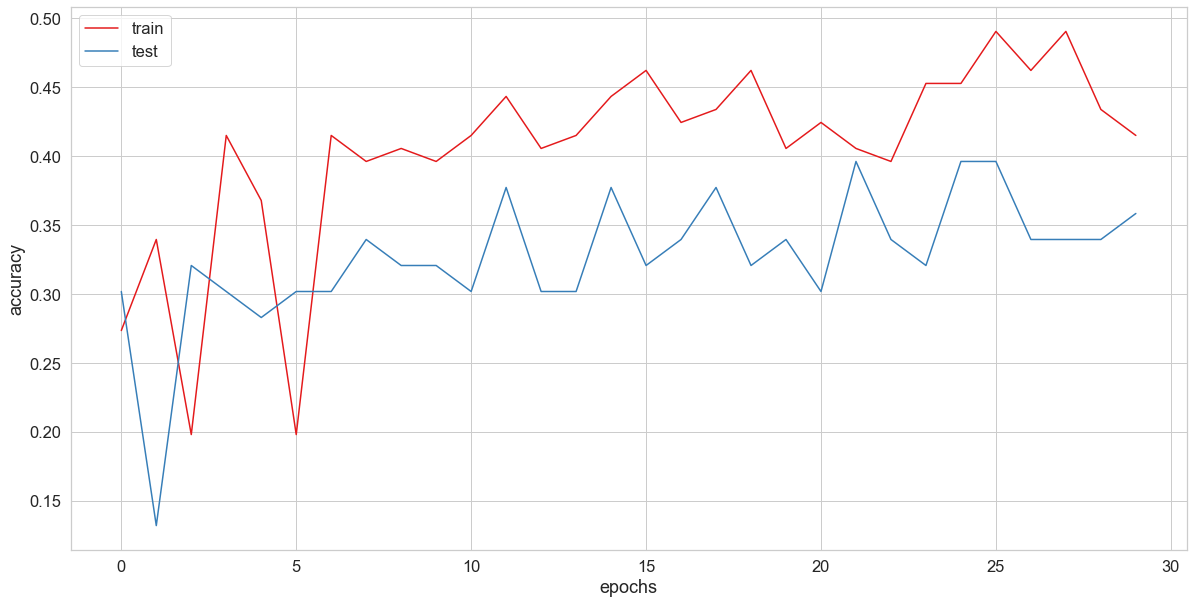

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

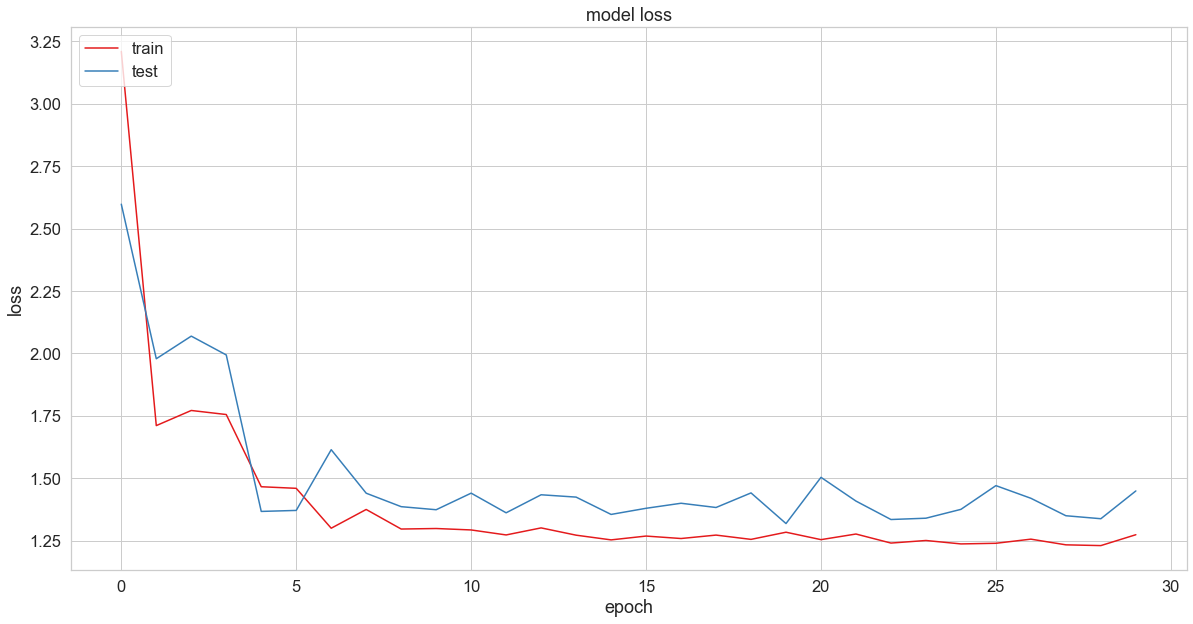

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Hyperparamter tuning using keras tuner**

In [ ]:
from kerastuner.tuners import RandomSearch
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='linear'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_categorical_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Favourite Category')

In [ ]:
tuner.search(X_train, y_train,
             epochs=30,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 10s]
val_categorical_accuracy: 0.5

Best val_categorical_accuracy So Far: 0.5083333253860474
Total elapsed time: 00h 00m 56s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in project\Favourite Category Softmax
Showing 10 best trials
Objective(name='val_categorical_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.01
units_2: 512
units_3: 192
units_4: 480
units_5: 448
units_6: 64
units_7: 512
units_8: 416
units_9: 224
units_10: 64
units_11: 96
units_12: 192
units_13: 128
units_14: 256
units_15: 320
units_16: 384
units_17: 32
Score: 0.5083333253860474
Trial summary
Hyperparameters:
num_layers: 9
units_0: 352
units_1: 288
learning_rate: 0.001
units_2: 128
units_3: 320
units_4: 480
units_5: 352
units_6: 192
units_7: 192
units_8: 64
units_9: 96
units_10: 384
units_11: 352
units_12: 416
units_13: 352
units_14: 320
units_15: 96
units_16: 384
units_17: 32
Score: 0.5
Trial summary
Hyperparameters:
num_layers: 5
units_0: 224
units_1: 96
learning_rate: 0.01
units_2: 128
units_3: 384
units_4: 352
units_5: 96
units_6: 320
units_7: 256
units_8: 288
units_9: 416
units_10: 160
units